In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
#引入統計軟體的套件

# 讀入資料(關於各國的各項橫斷面資料)

In [2]:
df=pd.read_csv('Countrydata.csv')

In [3]:
df.head()

,Area (KM),G-20,Petroleum,Pop (1000's),65 & over,Life Expectancy,Literacy %,GDP/cap,Labor force,Unemployment,Exports,Imports,Cell phones
0,2381740.0,0,2,31736,4.07,69.95,61.6,5.5,9.10,30.0,19.6,9.2,0.034
1,2766890.0,1,1,37385,10.42,75.26,96.2,12.9,15.00,15.0,26.5,25.2,3.000
2,7686850.0,1,1,19357,12.50,79.87,100.0,23.2,9.50,6.4,69.0,77.0,6.400
3,83858.0,0,0,8150,15.38,77.84,98.0,25.0,3.70,5.4,63.2,65.6,4.500
4,30510.0,0,0,10259,16.95,77.96,98.0,25.3,4.34,8.4,181.4,166.0,1.000


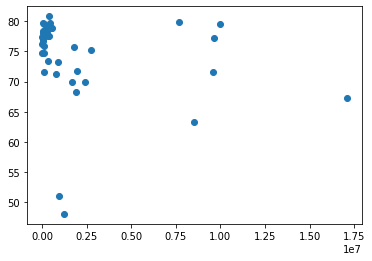

In [23]:
a=df['Area (KM)']
b=df['Life Expectancy']
plt.scatter(a,b)  
#似乎難以得知他們的關係

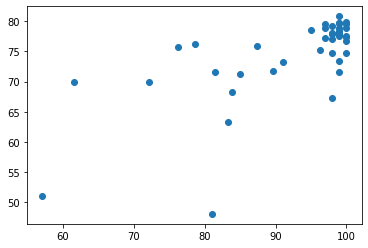

In [25]:
a1=df['Literacy %']
b=df['Life Expectancy']
plt.scatter(a1,b)
#可以推估他們的關係為正向

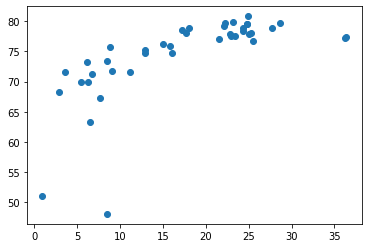

In [27]:
a2=df['GDP/cap']
b=df['Life Expectancy']
plt.scatter(a2,b)
#可以推估他們的關係為正向

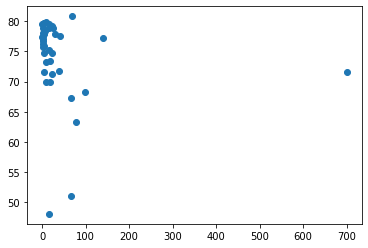

In [29]:
a3=df['Labor force']
b=df['Life Expectancy']
plt.scatter(a3,b)
#不清楚他們的關係

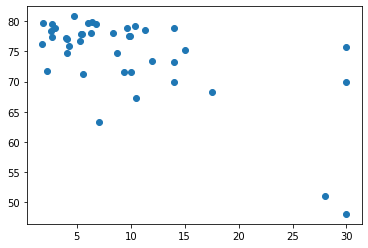

In [68]:
a7=df['Unemployment']
b=df['Life Expectancy']
plt.scatter(a7,b)
#推估為負向關係

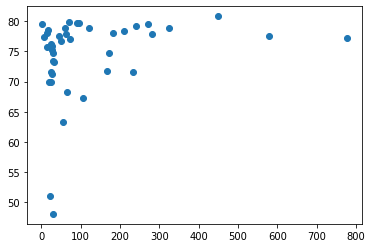

In [30]:
a4=df['Exports']
b=df['Life Expectancy']
plt.scatter(a4,b)
#好像有一個遞減式增加的關係

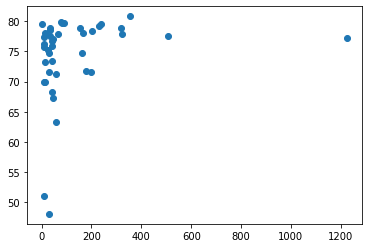

In [32]:
a5=df['Imports']
b=df['Life Expectancy']
plt.scatter(a5,b)
#不清楚他們的關係

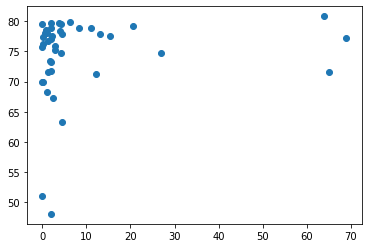

In [33]:
a6=df['Cell phones']
b=df['Life Expectancy']
plt.scatter(a6,b)
#不清楚他們的關係

In [92]:
x = df[['G-20','Literacy %','GDP/cap','Unemployment','Exports','Imports','Cell phones']]
y = df['Life Expectancy']
#想要得知預期壽命 如何受被解釋變數影響

# 使用OLS進行迴歸分析

In [93]:
est = sm.OLS(y,x).fit() 

In [94]:
y_pred = est.predict(x)

In [95]:
df['Life Expectancy_pred'] = y_pred #將預期壽命當作被解釋變數

In [96]:
print(est.summary())          

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              809.9
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                    6.85e-36
Time:                        17:59:43   Log-Likelihood:                         -130.03
No. Observations:                  41   AIC:                                      274.1
Df Residuals:                      34   BIC:                                      286.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [97]:
print(est.params)

G-20           -4.916281
Literacy %      0.780365
GDP/cap         0.007708
Unemployment    0.269780
Exports         0.010750
Imports        -0.007635
Cell phones     0.104520
dtype: float64


# 結論
一、 R-squared 非常的大，是因為他是uncentered，uncentered 表示他未減去y的平均值，然而我們所探討的y(預期壽命)平均值不可能為0，故R-squared會相當的大。

二、從係數可以推知
1. 當該國為G-20的會員國，其預期壽命會減少-4.916歲
2. 當識字比率高一百分比，其預期壽命會增加0.7804歲
3. 當每人GDP高一單位，其預期壽命會增加0.0077歲
4. 當失業率高一百分比，其預期壽命會增加0.2698歲
5. 當出口增加一單位，其預期壽命會增加0.0108歲
6. 當進口增加一單位，其預期壽命會減少0.0076歲
7. 當手機持有增加一單位，其預期壽命會增加0.1045歲

三、在90%信心水準下，變數中只有 G-20、識字比率、失業率 為顯著